# Introduction
This following Python program aims to rearrange the given folder and its subfolders in ordered way. My intention for creating this program is that I have a large collection of Videos and some of them are in folers others are without any folder, some program have subtitle and there are duplicate Videos present also there is a problem with the name of the files. So I'm Writing this program so that every file have a correct name and folder with subtitle file with the same name. I will also try to prepare a log file for the activities that are being performed and another log file for missing srt(subtitle file) files.

In [95]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Extraction

In [96]:
def ret_content(path):
    
    if not path.endswith('/'):
        path += '/'
    data = []
    
    for file in os.listdir(path):
        
        if os.path.isdir(path+file) and not file.startswith('.'):
            returned_data = ret_content(path+file)
            data.extend(returned_data)
        
        else:
            size = round(os.path.getsize(path+file) / (1024.0 * 1024.0), 3)
            file_name, extension = os.path.splitext(file)
            data.append((file_name, extension, size, path+file))
            
    return data

In [97]:
data = ret_content('/media/ketan/Seagate Expansion Drive/Movies/Hollywood')
# files, file_paths = ret_content("/home/ketan/Videos/vehicles")

# Data Visualization

In [98]:
data = pd.DataFrame(data, columns = ['file_name', 'extension', 'size', 'full_path'])
data.head()

,file_name,extension,size,full_path
0,Mission Impossible 4,.mkv,787.544,/media/ketan/Seagate Expansion Drive/Movies/Ho...
1,Mission Impossible Rogue Nation,.mkv,1224.990,/media/ketan/Seagate Expansion Drive/Movies/Ho...
2,Mission Impossible,.mkv,407.801,/media/ketan/Seagate Expansion Drive/Movies/Ho...
3,71.2014.720p.BluRay.x264.YIFY,.mp4,755.665,/media/ketan/Seagate Expansion Drive/Movies/Ho...
4,(2005)The Exorcism of Emily Rose,.mp4,1897.171,/media/ketan/Seagate Expansion Drive/Movies/Ho...


In [99]:
print(data.extension.unique())

['.mkv' '.mp4' '.srt' '.jpg' '.avi' '.bc!' '.txt' '.db' '.ini' '.MKV'
 '.idx' '.sub' '.ass' '.dat' '.zip' '.FLV' '.nfo' '.flv']


In [100]:
extension_count = []
for ext in data.extension.unique():
    c = data[data.extension == ext].count()
    extension_count.append(c.extension)
extension_count

[370, 284, 148, 123, 34, 4, 64, 7, 2, 2, 2, 2, 1, 4, 2, 3, 2, 1]

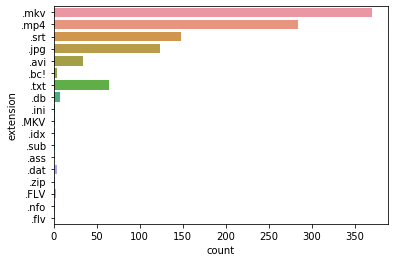

In [101]:
sns.countplot(y = 'extension', data = data)
plt.show()

# Examples of every type of file

In [102]:
for i in data.extension.unique():
    print("Examples for :", i)
    print(data[data.extension == i]['file_name'].head(1))
    print()

Examples for : .mkv
0    Mission Impossible 4
Name: file_name, dtype: object

Examples for : .mp4
3    71.2014.720p.BluRay.x264.YIFY
Name: file_name, dtype: object

Examples for : .srt
8    17.Again.2009.720p.BrRip.x264.YIFY
Name: file_name, dtype: object

Examples for : .jpg
9    WWW.YIFY-TORRENTS.COM
Name: file_name, dtype: object

Examples for : .avi
10    3 Musketeers
Name: file_name, dtype: object

Examples for : .bc!
29    Detective Byomkesh Bakshy (2015) Hindi 720p Bl...
Name: file_name, dtype: object

Examples for : .txt
31    A DDR Exclusive Release
Name: file_name, dtype: object

Examples for : .db
44    Thumbs
Name: file_name, dtype: object

Examples for : .ini
117    desktop
Name: file_name, dtype: object

Examples for : .MKV
134    Losers
Name: file_name, dtype: object

Examples for : .idx
164    Big.Hero.6.2014.1080p.BluRay.H264.AAC-RARBG
Name: file_name, dtype: object

Examples for : .sub
165    Big.Hero.6.2014.1080p.BluRay.H264.AAC-RARBG
Name: file_name, dtype: object



# Files Needing Renaming
some of the file contain spam texts. We need to replace them with correct one or remove them.

one of the feature that I have observed is file names which contain spam text usually have special characters.

In [103]:
def has_special_char(text: str) -> bool:
    return any(c for c in text if not c.isalnum() and not c.isspace())

In [104]:
defaulters = []
clean = []
for path in file_paths:
    file = path.split('/')[-1]
    file_name, extension = os.path.splitext(file)
    if has_special_char(file_name): defaulters.append(path)
    else: clean.append(path)

In [105]:
for i in range(10):
    print(defaulters[i])

/media/ketan/Seagate Expansion Drive/Movies/Hollywood/'71 (2014)/71.2014.720p.BluRay.x264.YIFY.mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/(2005)The Exorcism of Emily Rose.mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/03 Last Crusade - Harrison Ford Adventure Eng [H264-mp4].mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/17 Again (2009)/17.Again.2009.720p.BrRip.x264.YIFY.mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/17 Again (2009)/17.Again.2009.720p.BrRip.x264.YIFY.srt
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/17 Again (2009)/WWW.YIFY-TORRENTS.COM.jpg
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/310 to Yuma (2007)/310.to.Yuma.2007.720p.BrRip.x264.BOKUTOX.YIFY.mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/310 to Yuma (2007)/Catch Me If You Can (2002)/Catch.Me.If.You.Can.2002.720p.BluRay.x264.YIFY.mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/310 to Yuma (2007)/Catch Me If You Can (2002)/WWW.YIF

In [106]:
print(len(defaulters), " number of files need renaming out of", len(files))

543  number of files need renaming out of 1055


In [107]:
for i in range(10):
    print(clean[i])

/media/ketan/Seagate Expansion Drive/Movies/Hollywood/Mission Impossible/Mission Impossible 4.mkv
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/Mission Impossible/Mission Impossible Rogue Nation.mkv
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/Mission Impossible/Mission Impossible.mkv
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/000 Point Break.mkv
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/3 Musketeers.avi
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/300/300  Rise.mkv
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/300/300.mkv
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/300 Rise of an Empire (2014) [1080p]/300 Rise of an Empire.mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/300.mkv
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/Deadpool subs.srt


# Files with same name

# Extracting file and folder information

Finding out which file is inside a folder with same name or not.
for files which don't have folders create and move the files into folders.
do the same for srt files.

In [108]:
def compare_folder_file(folder_name, file_name):
    folder_name = folder_name.split(" ")
    file_name = file_name.split(" ")
    
    word_matched = 0
    
    for i, j in zip(folder_name, file_name):
        if j.lower() in i.lower():
            word_matched += 1
    if word_matched > 0: return False
    else: return True

In [109]:
without_folders = []
for path in file_paths:
    temp = path.split('/')
    
    file_name = os.path.splitext(temp[-1])[0]
    folder_name = temp[-2]
#     file_name not in folder_name
    if compare_folder_file(folder_name, file_name):
        without_folders.append(path)
for i in range(10):
    print(without_folders[i])

/media/ketan/Seagate Expansion Drive/Movies/Hollywood/'71 (2014)/71.2014.720p.BluRay.x264.YIFY.mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/(2005)The Exorcism of Emily Rose.mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/000 Point Break.mkv
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/03 Last Crusade - Harrison Ford Adventure Eng [H264-mp4].mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/17 Again (2009)/17.Again.2009.720p.BrRip.x264.YIFY.mp4
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/17 Again (2009)/17.Again.2009.720p.BrRip.x264.YIFY.srt
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/17 Again (2009)/WWW.YIFY-TORRENTS.COM.jpg
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/3 Musketeers.avi
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/300.mkv
/media/ketan/Seagate Expansion Drive/Movies/Hollywood/310 to Yuma (2007)/310.to.Yuma.2007.720p.BrRip.x264.BOKUTOX.YIFY.mp4
